In [1]:
!git clone https://github.com/ej0cl6/deep-active-learning.git
!cd deep-active-learning

Cloning into 'deep-active-learning'...
remote: Enumerating objects: 232, done.
remote: Total 232 (delta 0), reused 0 (delta 0), pack-reused 232
Receiving objects: 100% (232/232), 44.12 KiB | 3.39 MiB/s, done.
Resolving deltas: 100% (141/141), done.


In [2]:
import sys
sys.path.append('/content/deep-active-learning')
sys.path.append('/content/deep-active-learning/query_strategies')

In [3]:
import argparse
import numpy as np
import torch
from utils import get_dataset, get_net, get_strategy
from pprint import pprint
from torchvision import datasets
import matplotlib.pyplot as plt

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [5]:
dataset = get_dataset('FashionMNIST')                   # load dataset
net = get_net('FashionMNIST', device)                   # load network
#strategy = get_strategy('LeastConfidence')(dataset, net)

100%|██████████| 26421880/26421880 [00:02<00:00, 11705043.48it/s]


Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 207407.12it/s]


Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3911353.06it/s]


Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8247622.99it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



In [6]:
np.unique(dataset.Y_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([3981, 3996, 3935, 4022, 3957, 4017, 4066, 4042, 4000, 3984]))

In [7]:
dataset.X_train.shape ,dataset.Y_train.shape

(torch.Size([40000, 28, 28]), torch.Size([40000]))

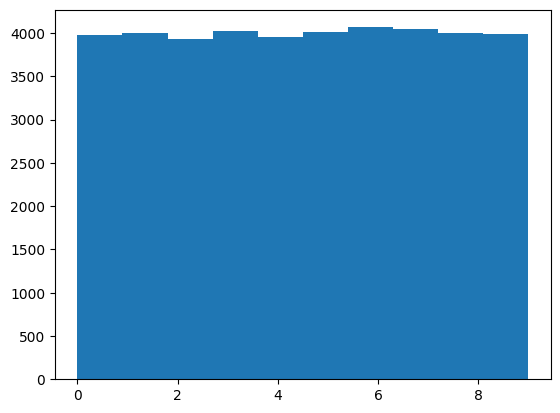

In [8]:
plt.hist(dataset.Y_train);

In [9]:
net.params['n_epoch'] = 10

In [10]:
def cal_training_acc(preds):
        return 1.0 * (dataset.Y_train==preds).sum().item() / dataset.n_pool

##**Uncertainty sampling (Least Confidence) strategy**


In [11]:
strategy = get_strategy('LeastConfidence')(dataset, net)

In [12]:
# start experiment
init = 10000
dataset.initialize_labels(init)
print(f"number of labeled pool: {init}")
print(f"number of unlabeled pool: {dataset.n_pool-init}")
print(f"number of testing pool: {dataset.n_test}")
print()

number of labeled pool: 10000
number of unlabeled pool: 30000
number of testing pool: 10000



In [13]:
Test_acc_uncertainty_based_Least_Confidence_Sampling = []

In [14]:
# round 1 accuracy
print("Round 1")
strategy.train()
# no. Epoch is 10
preds = strategy.predict(dataset.get_train_data()[1])
print(f"Round 1 training accuracy: {cal_training_acc(preds)}")

preds = strategy.predict(dataset.get_test_data())
print(f"Round 1 testing accuracy: {dataset.cal_test_acc(preds)}")
Test_acc_uncertainty_based_Least_Confidence_Sampling.append(dataset.cal_test_acc(preds))

Round 1


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


Round 1 training accuracy: 0.780475
Round 1 testing accuracy: 0.7691


In [15]:
for rd in range(2, 16):
    print(f"Round {rd}")

    # query
    query_idxs = strategy.query(100)

    # update labels
    strategy.update(query_idxs)
    strategy.train()

    # calculate accuracy on test and training
    preds = strategy.predict(dataset.get_train_data()[1])
    print(f"Round {rd} training accuracy: {cal_training_acc(preds)}")

    preds = strategy.predict(dataset.get_test_data())
    print(f"Round {rd} testing accuracy: {dataset.cal_test_acc(preds)}")
    Test_acc_uncertainty_based_Least_Confidence_Sampling.append(dataset.cal_test_acc(preds))

Round 2


100%|███████████████████████████████████████████████████████████████| 10/10 [00:30<00:00,  3.07s/it]


Round 2 training accuracy: 0.781325
Round 2 testing accuracy: 0.7723
Round 3


100%|███████████████████████████████████████████████████████████████| 10/10 [00:31<00:00,  3.12s/it]


Round 3 training accuracy: 0.778875
Round 3 testing accuracy: 0.7661
Round 4


100%|███████████████████████████████████████████████████████████████| 10/10 [00:31<00:00,  3.10s/it]


Round 4 training accuracy: 0.76725
Round 4 testing accuracy: 0.7542
Round 5


100%|███████████████████████████████████████████████████████████████| 10/10 [00:31<00:00,  3.18s/it]


Round 5 training accuracy: 0.787375
Round 5 testing accuracy: 0.7815
Round 6


100%|███████████████████████████████████████████████████████████████| 10/10 [00:32<00:00,  3.23s/it]


Round 6 training accuracy: 0.77995
Round 6 testing accuracy: 0.7714
Round 7


100%|███████████████████████████████████████████████████████████████| 10/10 [00:32<00:00,  3.26s/it]


Round 7 training accuracy: 0.775975
Round 7 testing accuracy: 0.765
Round 8


100%|███████████████████████████████████████████████████████████████| 10/10 [00:32<00:00,  3.25s/it]


Round 8 training accuracy: 0.77905
Round 8 testing accuracy: 0.7729
Round 9


100%|███████████████████████████████████████████████████████████████| 10/10 [00:33<00:00,  3.31s/it]


Round 9 training accuracy: 0.78025
Round 9 testing accuracy: 0.7687
Round 10


100%|███████████████████████████████████████████████████████████████| 10/10 [00:33<00:00,  3.35s/it]


Round 10 training accuracy: 0.775375
Round 10 testing accuracy: 0.7663
Round 11


100%|███████████████████████████████████████████████████████████████| 10/10 [00:33<00:00,  3.37s/it]


Round 11 training accuracy: 0.782375
Round 11 testing accuracy: 0.7719
Round 12


100%|███████████████████████████████████████████████████████████████| 10/10 [00:33<00:00,  3.39s/it]


Round 12 training accuracy: 0.78295
Round 12 testing accuracy: 0.7764
Round 13


100%|███████████████████████████████████████████████████████████████| 10/10 [00:33<00:00,  3.40s/it]


Round 13 training accuracy: 0.777925
Round 13 testing accuracy: 0.7708
Round 14


100%|███████████████████████████████████████████████████████████████| 10/10 [00:34<00:00,  3.43s/it]


Round 14 training accuracy: 0.78035
Round 14 testing accuracy: 0.7774
Round 15


100%|███████████████████████████████████████████████████████████████| 10/10 [00:34<00:00,  3.49s/it]


Round 15 training accuracy: 0.78485
Round 15 testing accuracy: 0.7741


##**Uncertainty sampling (Entropy Sampling Dropout) strategy**

In [16]:
# start experiment
init = 10000
dataset.initialize_labels(init)
print(f"number of labeled pool: {init}")
print(f"number of unlabeled pool: {dataset.n_pool-init}")
print(f"number of testing pool: {dataset.n_test}")
print()

number of labeled pool: 10000
number of unlabeled pool: 30000
number of testing pool: 10000



In [17]:
strategy = get_strategy('EntropySamplingDropout')(dataset, net)

In [18]:
Test_acc_uncertainty_based_Entropy_Sampling = []

In [19]:
# round 1 accuracy
print("Round 1")
strategy.train()
# no. Epoch is 10
preds = strategy.predict(dataset.get_train_data()[1])
print(f"Round 1 training accuracy: {cal_training_acc(preds)}")

preds = strategy.predict(dataset.get_test_data())
print(f"Round 1 testing accuracy: {dataset.cal_test_acc(preds)}")
Test_acc_uncertainty_based_Entropy_Sampling.append(dataset.cal_test_acc(preds))

Round 1


100%|███████████████████████████████████████████████████████████████| 10/10 [00:55<00:00,  5.59s/it]


Round 1 training accuracy: 0.80585
Round 1 testing accuracy: 0.7949


In [20]:
for rd in range(2, 16):
    print(f"Round {rd}")

    # query
    query_idxs = strategy.query(100)

    # update labels
    strategy.update(query_idxs)
    strategy.train()

    # calculate accuracy on test and training
    preds = strategy.predict(dataset.get_train_data()[1])
    print(f"Round {rd} training accuracy: {cal_training_acc(preds)}")

    preds = strategy.predict(dataset.get_test_data())
    print(f"Round {rd} testing accuracy: {dataset.cal_test_acc(preds)}")
    Test_acc_uncertainty_based_Entropy_Sampling.append(dataset.cal_test_acc(preds))

Round 2


100%|███████████████████████████████████████████████████████████████| 10/10 [00:55<00:00,  5.54s/it]


Round 2 training accuracy: 0.805625
Round 2 testing accuracy: 0.7937
Round 3


100%|███████████████████████████████████████████████████████████████| 10/10 [00:56<00:00,  5.63s/it]


Round 3 training accuracy: 0.79875
Round 3 testing accuracy: 0.7908
Round 4


100%|███████████████████████████████████████████████████████████████| 10/10 [00:56<00:00,  5.66s/it]


Round 4 training accuracy: 0.79785
Round 4 testing accuracy: 0.7858
Round 5


100%|███████████████████████████████████████████████████████████████| 10/10 [00:56<00:00,  5.68s/it]


Round 5 training accuracy: 0.80025
Round 5 testing accuracy: 0.7966
Round 6


100%|███████████████████████████████████████████████████████████████| 10/10 [00:57<00:00,  5.70s/it]


Round 6 training accuracy: 0.79145
Round 6 testing accuracy: 0.7839
Round 7


100%|███████████████████████████████████████████████████████████████| 10/10 [00:57<00:00,  5.74s/it]


Round 7 training accuracy: 0.8133
Round 7 testing accuracy: 0.801
Round 8


100%|███████████████████████████████████████████████████████████████| 10/10 [00:58<00:00,  5.82s/it]


Round 8 training accuracy: 0.797725
Round 8 testing accuracy: 0.7859
Round 9


100%|███████████████████████████████████████████████████████████████| 10/10 [00:58<00:00,  5.80s/it]


Round 9 training accuracy: 0.805925
Round 9 testing accuracy: 0.7937
Round 10


100%|███████████████████████████████████████████████████████████████| 10/10 [00:58<00:00,  5.83s/it]


Round 10 training accuracy: 0.788525
Round 10 testing accuracy: 0.7777
Round 11


100%|███████████████████████████████████████████████████████████████| 10/10 [00:58<00:00,  5.85s/it]


Round 11 training accuracy: 0.804125
Round 11 testing accuracy: 0.7945
Round 12


100%|███████████████████████████████████████████████████████████████| 10/10 [00:58<00:00,  5.88s/it]


Round 12 training accuracy: 0.810725
Round 12 testing accuracy: 0.8003
Round 13


100%|███████████████████████████████████████████████████████████████| 10/10 [00:59<00:00,  5.93s/it]


Round 13 training accuracy: 0.803825
Round 13 testing accuracy: 0.7957
Round 14


100%|███████████████████████████████████████████████████████████████| 10/10 [01:00<00:00,  6.00s/it]


Round 14 training accuracy: 0.80395
Round 14 testing accuracy: 0.7922
Round 15


100%|███████████████████████████████████████████████████████████████| 10/10 [00:59<00:00,  5.99s/it]


Round 15 training accuracy: 0.804225
Round 15 testing accuracy: 0.7936


##**Uncertainty sampling (Margin Sampling) strategy**


In [11]:
# start experiment
init = 10000
dataset.initialize_labels(init)
print(f"number of labeled pool: {init}")
print(f"number of unlabeled pool: {dataset.n_pool-init}")
print(f"number of testing pool: {dataset.n_test}")
print()

number of labeled pool: 10000
number of unlabeled pool: 30000
number of testing pool: 10000



In [12]:
strategy = get_strategy('MarginSampling')(dataset, net)

In [13]:
Test_acc_uncertainty_based_Margin_Sampling = []

In [14]:
# round 1 accuracy
print("Round 1")
strategy.train()
# no. Epoch is 10
preds = strategy.predict(dataset.get_train_data()[1])
print(f"Round 1 training accuracy: {cal_training_acc(preds)}")

preds = strategy.predict(dataset.get_test_data())
print(f"Round 1 testing accuracy: {dataset.cal_test_acc(preds)}")
Test_acc_uncertainty_based_Margin_Sampling.append(dataset.cal_test_acc(preds))

Round 1


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


Round 1 training accuracy: 0.7714
Round 1 testing accuracy: 0.7634


In [15]:
for rd in range(2, 16):
    print(f"Round {rd}")

    # query
    query_idxs = strategy.query(100)

    # update labels
    strategy.update(query_idxs)
    strategy.train()

    # calculate accuracy on test and training
    preds = strategy.predict(dataset.get_train_data()[1])
    print(f"Round {rd} training accuracy: {cal_training_acc(preds)}")

    preds = strategy.predict(dataset.get_test_data())
    print(f"Round {rd} testing accuracy: {dataset.cal_test_acc(preds)}")
    Test_acc_uncertainty_based_Margin_Sampling.append(dataset.cal_test_acc(preds))

Round 2


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.07s/it]


Round 2 training accuracy: 0.77255
Round 2 testing accuracy: 0.7669
Round 3


100%|███████████████████████████████████████████████████████████████| 10/10 [00:33<00:00,  3.37s/it]


Round 3 training accuracy: 0.773325
Round 3 testing accuracy: 0.7667
Round 4


100%|███████████████████████████████████████████████████████████████| 10/10 [00:33<00:00,  3.34s/it]


Round 4 training accuracy: 0.7762
Round 4 testing accuracy: 0.7683
Round 5


100%|███████████████████████████████████████████████████████████████| 10/10 [00:33<00:00,  3.32s/it]


Round 5 training accuracy: 0.777425
Round 5 testing accuracy: 0.7689
Round 6


100%|███████████████████████████████████████████████████████████████| 10/10 [00:32<00:00,  3.29s/it]


Round 6 training accuracy: 0.7767
Round 6 testing accuracy: 0.7715
Round 7


100%|███████████████████████████████████████████████████████████████| 10/10 [00:33<00:00,  3.33s/it]


Round 7 training accuracy: 0.76915
Round 7 testing accuracy: 0.7609
Round 8


100%|███████████████████████████████████████████████████████████████| 10/10 [00:34<00:00,  3.41s/it]


Round 8 training accuracy: 0.760975
Round 8 testing accuracy: 0.7536
Round 9


100%|███████████████████████████████████████████████████████████████| 10/10 [00:34<00:00,  3.46s/it]


Round 9 training accuracy: 0.778975
Round 9 testing accuracy: 0.7722
Round 10


100%|███████████████████████████████████████████████████████████████| 10/10 [00:35<00:00,  3.51s/it]


Round 10 training accuracy: 0.777925
Round 10 testing accuracy: 0.7652
Round 11


100%|███████████████████████████████████████████████████████████████| 10/10 [00:34<00:00,  3.50s/it]


Round 11 training accuracy: 0.77815
Round 11 testing accuracy: 0.7706
Round 12


100%|███████████████████████████████████████████████████████████████| 10/10 [00:35<00:00,  3.57s/it]


Round 12 training accuracy: 0.766075
Round 12 testing accuracy: 0.7538
Round 13


100%|███████████████████████████████████████████████████████████████| 10/10 [00:35<00:00,  3.60s/it]


Round 13 training accuracy: 0.7806
Round 13 testing accuracy: 0.7709
Round 14


100%|███████████████████████████████████████████████████████████████| 10/10 [00:35<00:00,  3.56s/it]


Round 14 training accuracy: 0.779525
Round 14 testing accuracy: 0.7726
Round 15


100%|███████████████████████████████████████████████████████████████| 10/10 [00:36<00:00,  3.66s/it]


Round 15 training accuracy: 0.79155
Round 15 testing accuracy: 0.78


##**Comparing results**

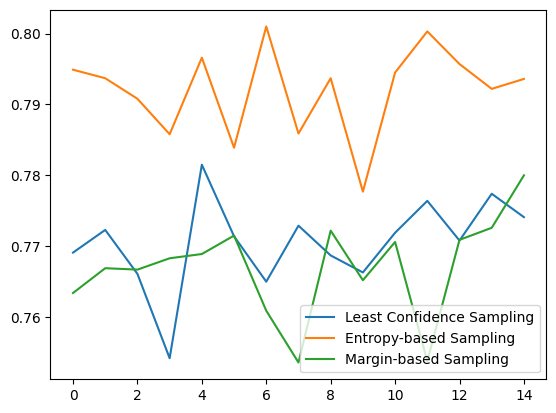

In [18]:
plt.plot(Test_acc_uncertainty_based_Least_Confidence_Sampling, label = 'Least Confidence Sampling')
plt.plot(Test_acc_uncertainty_based_Entropy_Sampling, label = 'Entropy-based Sampling')
plt.plot(Test_acc_uncertainty_based_Margin_Sampling, label = 'Margin-based Sampling')
plt.legend()
plt.show()